In [1]:
import cospar as cs
import pandas as pd
import scipy
import numpy as np
import os
import scanpy as sc
from cospar.plotting import _utils as pl_util

%reload_ext autoreload
%autoreload 2

import pandas as pd
import torch
import seaborn as sns
import matplotlib.pyplot as plt

### Benchmarking with CoSpar - Clone level ground truth - Mouse hematopoiesis - prog_Baso_Meg_Ery_Mast → Ery

#### 1.	Description of the used dataset, with last two columns representing the collected clone ID and the assigned meta-clone ID as described in Methods section. 

In [3]:
adata = sc.read_h5ad('../datasets/Weinreb/adata_used.h5ad')
adata.obs['Clone_ID'] = [name[6:] for name in adata.obs.clones.values]
adata

AnnData object with n_obs × n_vars = 44756 × 5000
    obs: 'Time_point', 'Population', 'Annotation', 'Well', 'time_cat', 'leiden', 'comb', 'label_man', 'clones', 'meta_clones', 'Clone_ID'
    var: 'symbol', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Annotation_colors', 'Time_point_colors', 'comb_colors', 'hvg', 'label_man_colors', 'label_man_sizes', 'leiden', 'leiden_colors', 'log1p', 'meta_clones_colors', 'neighbors', 'paga', 'pca', 'time_cat_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [4]:
adata.obs

,Time_point,Population,Annotation,Well,time_cat,leiden,comb,label_man,clones,meta_clones,Clone_ID
0,6.0,LK,undiff,2,6.0,16,undiff_16,prog_2,Clone_573,8,573
1,6.0,LK,undiff,2,6.0,10,undiff_10,prog_Baso_Meg_Ery_Mast,Clone_1440,8,1440
2,6.0,LK,Monocyte,2,6.0,3,Monocyte_3,prog_Mono,Clone_394,0,394
4,6.0,LK,undiff,2,6.0,9,undiff_9,prog_Meg_Ery,Clone_1972,4,1972
6,6.0,LK,Neutrophil,2,6.0,7,Neutrophil_7,prog_Neu,Clone_1450,3,1450
...,...,...,...,...,...,...,...,...,...,...,...
130875,6.0,LSK,undiff,1,6.0,9,undiff_9,prog_Meg_Ery,Clone_12,4,12
130876,6.0,LSK,undiff,1,6.0,0,undiff_0,prog_2,Clone_267,8,267
130877,6.0,LSK,Neutrophil,1,6.0,1,Neutrophil_1,early_prog_Neu,Clone_3534,1,3534
130879,6.0,LSK,Monocyte,1,6.0,13,Monocyte_13,prog_Mono,Clone_4945,0,4945


#### 2. Data initialization and a few pre-processing steps as stated in CoSpar documentations.

creating directory data for saving data
creating directory figure for saving figures
Create new anndata object
Time points with clonal info: []
Finding highly variable genes...


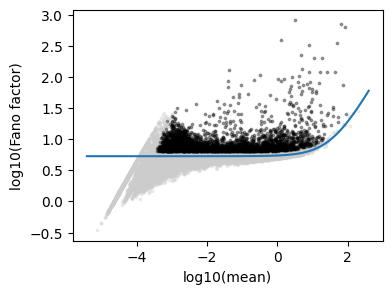

Keeping 3096 genes
Number of selected non-cycling highly variable genes: 3091
Remove 5 cell cycle correlated genes.
adata.var['highly_variable'] updated


100%|██████████| 44756/44756 [00:00<00:00, 1506426.05it/s]

reorder clones


In [5]:
RNA_count_matrix = scipy.sparse.coo_matrix(np.expm1(adata.raw.X))

adata_orig = cs.pp.initialize_adata_object(
    X_state=RNA_count_matrix,
    gene_names=adata.raw.var_names,
    cell_names=adata.obs.index,
    time_info=adata.obs.Time_point.values,
    state_info=adata.obs.label_man.values,
    X_emb=adata.obsm['X_umap'],
    X_pca=adata.obsm['X_pca'],
    data_des="cospar",
)

cs.pp.get_highly_variable_genes(adata_orig)
cs.pp.remove_cell_cycle_correlated_genes(adata_orig, corr_threshold=0.5, confirm_change=True)
cs.pp.get_X_clone(adata_orig, adata.obs.index.values, adata.obs.Clone_ID.values)

In [6]:
adata_orig

AnnData object with n_obs × n_vars = 44756 × 25289
    obs: 'time_info', 'state_info', 'n_counts'
    var: 'highly_variable'
    uns: 'data_des', 'time_ordering', 'clonal_time_points', 'clone_id'
    obsm: 'X_clone', 'X_pca', 'X_emb'

#### 3. There are in total 10 different terminal fates for this dataset.

In [7]:
selected_fates = ["Ery", "Meg", "Eos", "Mast", "DC", "Mono", "Neu", "pDC", "Ly", 'Baso']
cs.tl.fate_coupling(adata_orig, selected_fates=selected_fates, source="X_clone") 
cs.tl.fate_hierarchy(adata_orig, selected_fates=selected_fates, source="X_clone")

normalize by X_clone
each cluster do not have a unique time point. Simply column-normalize the matrix
Results saved as dictionary at adata.uns['fate_coupling_X_clone']
normalize by X_clone
each cluster do not have a unique time point. Simply column-normalize the matrix
normalize by X_clone
each cluster do not have a unique time point. Simply column-normalize the matrix
normalize by X_clone
each cluster do not have a unique time point. Simply column-normalize the matrix
normalize by X_clone
each cluster do not have a unique time point. Simply column-normalize the matrix
normalize by X_clone
each cluster do not have a unique time point. Simply column-normalize the matrix
normalize by X_clone
each cluster do not have a unique time point. Simply column-normalize the matrix
normalize by X_clone
each cluster do not have a unique time point. Simply column-normalize the matrix
normalize by X_clone
each cluster do not have a unique time point. Simply column-normalize the matrix
Results saved as

In [8]:
adata_orig

AnnData object with n_obs × n_vars = 44756 × 25289
    obs: 'time_info', 'state_info', 'n_counts'
    var: 'highly_variable'
    uns: 'data_des', 'time_ordering', 'clonal_time_points', 'clone_id', 'available_map', 'fate_coupling_X_clone', 'fate_hierarchy_X_clone'
    obsm: 'X_clone', 'X_pca', 'X_emb'

#### 4. Then we infer the transition map, CoSpar provides 3 different options for inferring the map. And we chose to use the one when time series clonal barcodes are available.

------Compute the full Similarity matrix if necessary------
--> Compute similarity matrix: computing new; beta=0.1
Smooth round: 1
--> Time elapsed: 0.5382182598114014
Smooth round: 2
--> Time elapsed: 1.2012691497802734
Smooth round: 3
--> Time elapsed: 9.61824655532837
Smooth round: 4
--> Time elapsed: 32.1773681640625
--> Orignal sparsity=0.14271761680444023, Thresholding
--> Final sparsity=0.060930995093595786
similarity matrix truncated (Smooth round=4):  29.748476266860962
Smooth round: 5
--> Time elapsed: 31.992136001586914
--> Orignal sparsity=0.14296242141408994, Thresholding
--> Final sparsity=0.08457898469604558
similarity matrix truncated (Smooth round=5):  29.373701572418213
--> Save the matrix at every 5 rounds
Smooth round: 6
--> Time elapsed: 40.6049427986145
--> Orignal sparsity=0.17219351000838132, Thresholding
--> Final sparsity=0.10732222445085725
similarity matrix truncated (Smooth round=6):  29.641457319259644
Smooth round: 7
--> Time elapsed: 50.84493541717529
--

/ssd/users/mingzegao/.conda/envs/clonetrans/lib/python3.9/site-packages/cospar/tmap/map_reconstruction.py:237: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["data_des"] = [data_des_orig, data_des]


------Infer transition map between initial time points and the later time one------
--------Current initial time point: 2.0--------
Step 1: Select time points
--> Clonal cell fraction (day 2.0-6.0): 0.5239973701512163
--> Clonal cell fraction (day 6.0-2.0): 0.3121820136151917
--> Numer of cells that are clonally related -- day 2.0: 1594  and day 6.0: 8713
Number of multi-time clones post selection: 1135


/ssd/users/mingzegao/.conda/envs/clonetrans/lib/python3.9/site-packages/cospar/tmap/_utils.py:390: ImplicitModificationWarning: Setting element `.obsm['X_clone']` of view, initializing view as actual.
  adata.obsm["X_clone"] = clone_annot


Cell number=30952, Clone number=1135
--> clonal_cell_id_t1: 1594
--> Tmap_cell_id_t1: 3042
Step 2: Optimize the transition map recursively
Load pre-computed similarity matrix
--> Load from hard disk--------
--> Compute similarity matrix: load existing data
--> Time elapsed:  0.1658153533935547
--> Time elapsed:  2.787811517715454
--> Time elapsed:  0.26310300827026367
--> Time elapsed:  4.339653253555298
--> Compute similarity matrix: load existing data
--> Time elapsed:  0.13669872283935547
--> Time elapsed:  2.395612955093384
--> Time elapsed:  0.2512679100036621
--> Time elapsed:  3.8835270404815674
--> Compute similarity matrix: load existing data
--> Time elapsed:  0.09802746772766113
--> Time elapsed:  2.120436906814575
--> Time elapsed:  0.17455577850341797
--> Time elapsed:  3.714128255844116
--> Compute similarity matrix: load existing data
--> Time elapsed:  0.05472874641418457
--> Time elapsed:  1.4129040241241455
--> Time elapsed:  0.1123652458190918
--> Time elapsed:  2.89

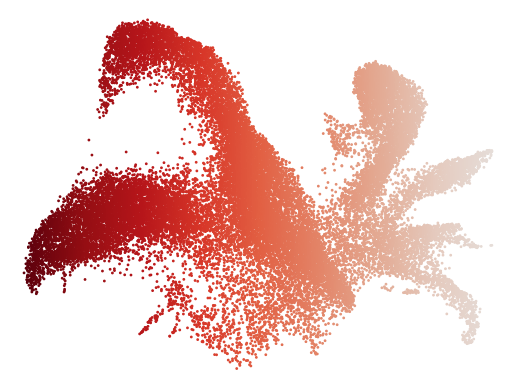

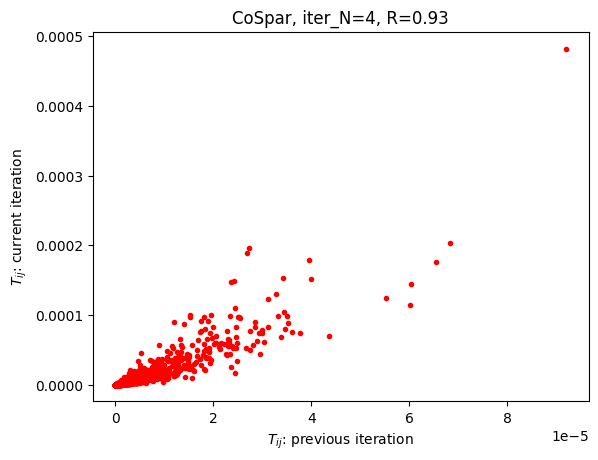

Iteration 5, Use smooth_round=5
--> Clone normalization
--> Relative time point pair index: 0
--> Clone id: 0
--> Clone id: 1000
--> Start to smooth the refined clonal map
--> Phase I: time elapsed --  1.129941463470459
--> Phase II: time elapsed --  1.2712464332580566


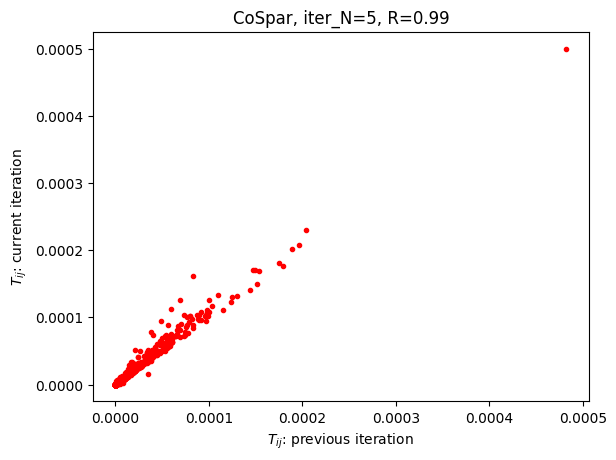

--> Final round of Smooth (to expand the state space of Tmap to include non-clonal states)
--> Phase I: time elapsed --  3.3684470653533936
--> Phase II: time elapsed --  3.927757501602173
--> ----Intraclone transition map----
--> Clone normalization
--> Relative time point pair index: 0
--> Clone id: 0
--> Clone id: 1000
--------Current initial time point: 4.0--------
Step 1: Select time points
--> Clonal cell fraction (day 4.0-6.0): 0.8406259055346277
--> Clonal cell fraction (day 6.0-4.0): 0.8919025438910785
--> Numer of cells that are clonally related -- day 4.0: 11604  and day 6.0: 24893
Number of multi-time clones post selection: 2824
Cell number=41714, Clone number=2824
--> clonal_cell_id_t1: 11604
--> Tmap_cell_id_t1: 13804
Step 2: Optimize the transition map recursively
Load pre-computed similarity matrix
--> Load from hard disk--------
--> Compute similarity matrix: load existing data
--> Time elapsed:  2.740389823913574
--> Time elapsed:  10.05428671836853
--> Time elapsed: 

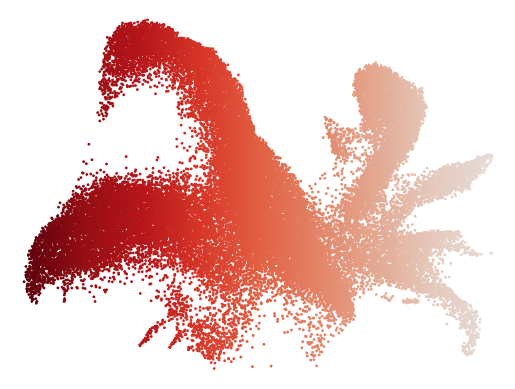

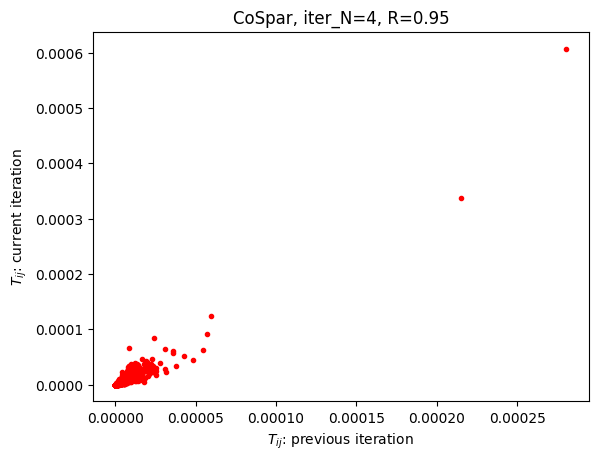

--> Final round of Smooth (to expand the state space of Tmap to include non-clonal states)
--> Phase I: time elapsed --  15.811083793640137
--> Phase II: time elapsed --  26.4653639793396
--> ----Intraclone transition map----
--> Clone normalization
--> Relative time point pair index: 0
--> Clone id: 0
--> Clone id: 1000
--> Clone id: 2000
-----------Total used time: 4903.569008588791 s ------------


In [9]:
adata_all_latert = adata_orig.copy()

adata_all_latert = cs.tmap.infer_Tmap_from_multitime_clones(
    adata_all_latert,
    clonal_time_points=['2.0', '4.0', '6.0'],
    later_time_point='6.0',
    smooth_array=[20, 15, 10, 5],
    max_iter_N=10,
)

In [10]:
adata_all_latert

AnnData object with n_obs × n_vars = 44756 × 25289
    obs: 'time_info', 'state_info', 'n_counts'
    var: 'highly_variable'
    uns: 'data_des', 'time_ordering', 'clonal_time_points', 'clone_id', 'available_map', 'fate_coupling_X_clone', 'fate_hierarchy_X_clone', 'neighbors', 'Tmap_cell_id_t1', 'Tmap_cell_id_t2', 'clonal_cell_id_t1', 'clonal_cell_id_t2', 'sp_idx', 'transition_map', 'intraclone_transition_map'
    obsm: 'X_clone', 'X_pca', 'X_emb'
    obsp: 'distances', 'connectivities'

#### 5. Transition probability for Ery cluster

/ssd/users/mingzegao/.conda/envs/clonetrans/lib/python3.9/site-packages/cospar/tool/_utils.py:235: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  state_annote[cell_id_t2] == yy


Results saved at adata.obs['fate_map_transition_map_Ery']


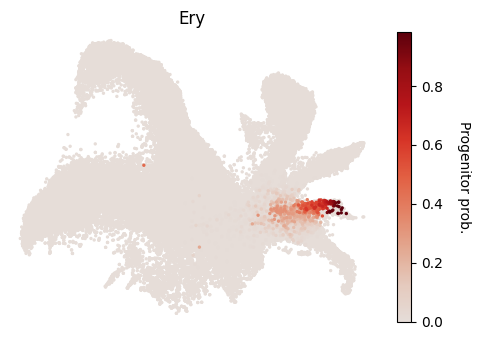

In [11]:
cs.tl.fate_map(adata_all_latert, selected_fates=["Ery"], source="transition_map", map_backward=True)
cs.pl.fate_map(adata_all_latert, selected_fates=["Ery"], source="transition_map", plot_target_state=False, show_histogram=False)

#### 6. Aggregrate CoSpar scores to meta-clone level

In [12]:
'''
Since the transition probability provided by CoSpar to a given cluster is on single cell level, which has a higher resolution than what CLADES is designed to do, we transferred the meta-clone label to each cell. 
Cells with a positive CoSpar assigned score are used, removing the "NA" scores, 16,848 cells left. 
After that, we get the scores for prog_Baso_Meg_Ery_Mast, as this is the progenitor population we care about in this example, and 587 cells remain. 
'''

adata_all_latert.obs['meta_clones'] = adata.obs['meta_clones'].values
adata_all_latert.obs['Clone_ID'] = adata.obs['Clone_ID'].values

df = adata_all_latert.obs[['time_info', 'state_info', 'meta_clones', 'Clone_ID', 'fate_map_transition_map_Ery']]
df = df[df[f'fate_map_transition_map_Ery'] >= 0] # 16,846 cells left
df = df[df['state_info'] == 'prog_Baso_Meg_Ery_Mast'] # 587 cells left
df

,time_info,state_info,meta_clones,Clone_ID,fate_map_transition_map_Ery
9915,4.0,prog_Baso_Meg_Ery_Mast,2,363,0.002774
10353,4.0,prog_Baso_Meg_Ery_Mast,2,659,0.000000
10621,4.0,prog_Baso_Meg_Ery_Mast,2,5617,0.000000
10790,4.0,prog_Baso_Meg_Ery_Mast,1,673,0.000000
10820,4.0,prog_Baso_Meg_Ery_Mast,2,4784,0.000039
...,...,...,...,...,...
111013,4.0,prog_Baso_Meg_Ery_Mast,2,1596,0.000000
111204,4.0,prog_Baso_Meg_Ery_Mast,2,2062,0.000000
111391,4.0,prog_Baso_Meg_Ery_Mast,2,1091,0.000075
111449,4.0,prog_Baso_Meg_Ery_Mast,5,2685,0.000000


In [13]:
''' 
We treat this score as the bias score for prog_Baso_Meg_Ery_Mast → Ery. 
And then we calculated the mean for each meta-clone as the average meta-clone level bias score. 
Meta-clone 7, 11 & 12 does not have this progenitor population, thus, do not have a bias score. 
'''

cospar_bias = pd.DataFrame(df.groupby('meta_clones')[f'fate_map_transition_map_Ery'].mean())
cospar_bias.T

/tmp/ipykernel_973921/2742589962.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cospar_bias = pd.DataFrame(df.groupby('meta_clones')[f'fate_map_transition_map_Ery'].mean())


meta_clones,0,1,2,3,4,5,6,7,8,9,10,11,12
fate_map_transition_map_Ery,0.004622,0.000766,0.006513,0.000085,0.008319,0.001135,0.001259,NaN,0.009009,0.029812,0.014393,NaN,NaN


In [14]:
'''
Metrics between different methods cannot be compared directly, as the magnitude of numbers of CoSpar may not equivalent to other methods.
Therefore, for comparison purpose, the above bias score is normalized between 0 and 1. 
'''

def min_max(array):
    return (array - min(array)) / (max(array) - min(array))

cospar_bias = cospar_bias.fillna(-1)
cospar_bias = cospar_bias[f'fate_map_transition_map_Ery'].values
cospar_bias = np.array(cospar_bias)[np.where(cospar_bias != -1)[0]]
cospar_bias = min_max(cospar_bias)
cospar_bias

array([0.15264697, 0.02291436, 0.21623756, 0.        , 0.27701519,
       0.03531988, 0.03950689, 0.30020742, 1.        , 0.48132576])

So what we really compared is, the relative potential of transitioning to a certain fate, instead of the quantified score, as scores are calculated in different ways for different algorithms. 

And the above array is the final bias score for each meta-clone given by CoSpar. 

So a score 0 does not necessarily mean this meta-clone has 0 potential to Ery cluster, it just means the potential is relatively smaller than other meta-clones. 

#### 7. Performance of CLADES

In [15]:
import os 
os.chdir('/ssd/users/mingzegao/clonaltrans/clonaltrans/')

path = '../trials/original/checkpoints/WeinrebDynamicRates/0301_112802/model_last.pt'
model = torch.load(path, map_location='cpu')
device = torch.device('cpu')

import os 
os.chdir('/ssd/users/mingzegao/clonaltrans/')

In [16]:
anno = pd.read_csv(os.path.join(model.config['data_loader']['args']['data_dir'], model.config['data_loader']['args']['annots']))
cluster_names = anno['populations'].values[:model.N.shape[2]]

gillespie_dir='./trials/original/checkpoints/WeinrebDynamicGillespie/0301_211649/models/'

In [17]:
from clonaltrans.pl import get_fate_prob, get_transit_path, get_tracer_bias

aggre = get_fate_prob(model, cluster_names, gillespie_dir)
transit_paths = get_transit_path(model, cluster_names, 'prog_Baso_Meg_Ery_Mast', 'Ery')
tracer_bias = get_tracer_bias(transit_paths, aggre)

tracer_bias = np.array(tracer_bias)[np.where(cospar_bias != -1)[0]]
tracer_bias = min_max(tracer_bias)
tracer_bias

array([0.35200585, 0.        , 0.20975126, 0.28528579, 1.        ,
       0.04209946, 0.08419893, 0.        , 0.00913918, 0.        ])

In [18]:
transit_paths

[['prog_Baso_Meg_Ery_Mast', 'prog_Meg_Ery', 'Ery']]

#### 8. Comparison with ground truth

/ssd/users/mingzegao/clonaltrans/clonaltrans/pl/benchmark.py:70: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('meta_clones')[f'fate_map_transition_map_{fate}'].mean()


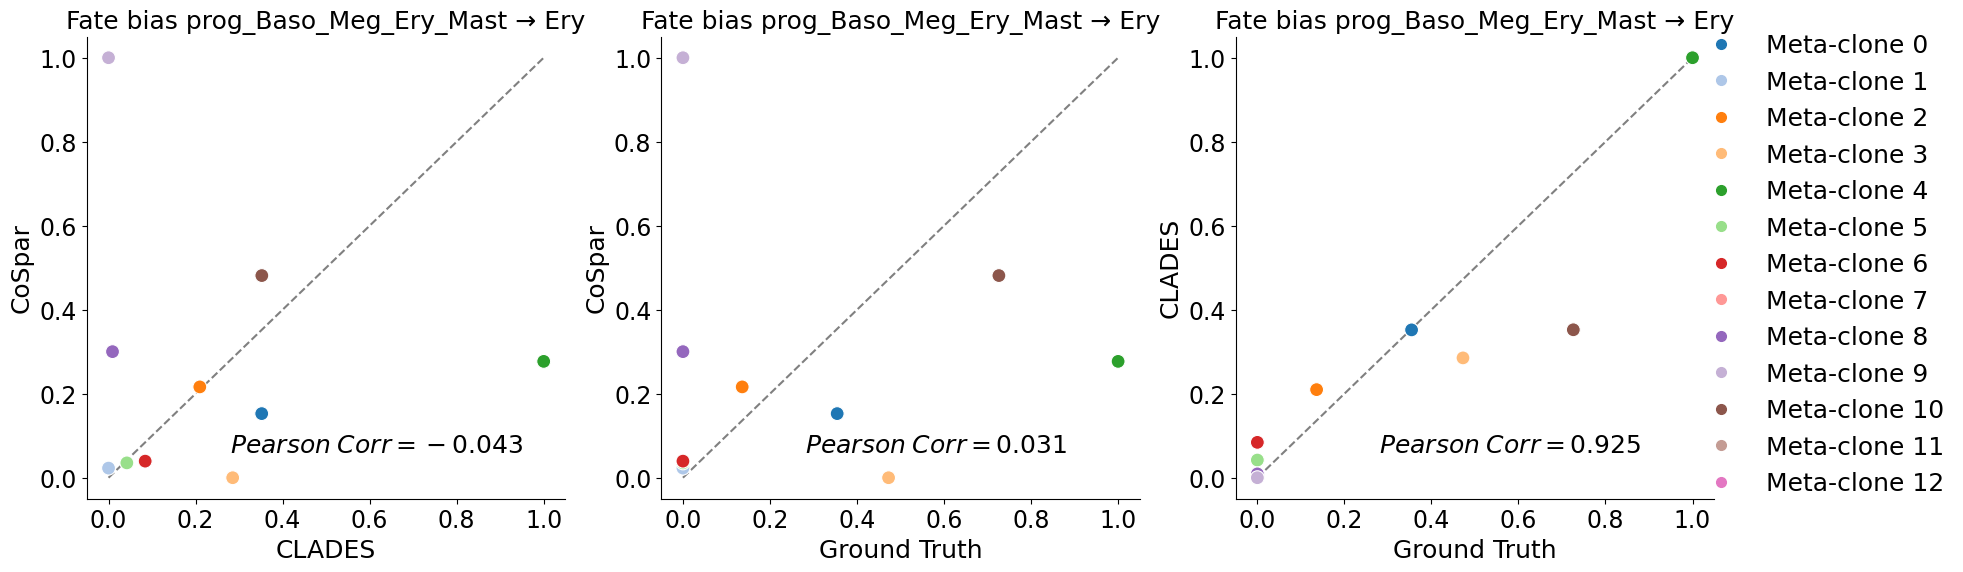

In [21]:
from clonaltrans.pl import with_cospar

with_cospar(
    adata_all_latert, 
    adata, 
    'prog_Baso_Meg_Ery_Mast', 
    'Ery', 
    model, 
    cluster_names,
    gillespie_dir
)